<a href="https://colab.research.google.com/github/10-ThiagoB82/Classificar_Imagens_Keras_Tensorflow/blob/main/DEEP_LEARNING_KERAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
#IMPORTAR.
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

In [40]:
#CARREGAR O DATASET.
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino),(imagens_teste, identificacoes_teste)) = dataset.load_data()

In [41]:
#EXPLORAR OS DADOS.
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)
identificacoes_treino.min()
identificacoes_treino.max()

9

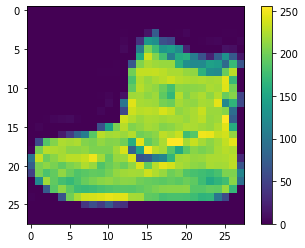

In [42]:
#EXIBIR OS DADOS.
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco',
                           'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']

plt.imshow(imagens_treino[0])
plt.colorbar()

In [43]:
#NORMALIZANDO AS IMAGENS.
imagens_treino = imagens_treino/float(250)

In [45]:
#CRIANDO,COMPILANDO,TREINANDO E NORMALIZANDO O MODELO.
#DROPOUT(0.2) DIMINUI O VALOR DO TREINO(MAIS USADO).


modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tf.nn.relu),
#   keras.layers.Dense(128, activation=tf.nn.relu),
#   keras.layers.Dense(64, activation=tf.nn.relu),
#   keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tf.nn.softmax)])

adam = keras.optimizers.Adam(lr=0.002)

'''lr
learning rate
taxa de aprendizado'''

parando_cedo = [keras.callbacks.EarlyStopping(monitor = 'val_loss'),
                keras.callbacks.ModelCheckpoint(filepath= 'melhor_modelo.hdf5',
                                                monitor='val_loss', save_best_only=True)]

modelo.compile(optimizer=adam,
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, batch_size = 480,
                       epochs=5, validation_split=0.2, callbacks=parando_cedo )


Epoch 1/5
100/100 [==============================] - 2s 17ms/step - loss: 0.9625 - accuracy: 0.6624 - val_loss: 0.4586 - val_accuracy: 0.8368
Epoch 2/5
100/100 [==============================] - 1s 14ms/step - loss: 0.4559 - accuracy: 0.8386 - val_loss: 0.4088 - val_accuracy: 0.8514
Epoch 3/5
100/100 [==============================] - 1s 14ms/step - loss: 0.4009 - accuracy: 0.8581 - val_loss: 0.3825 - val_accuracy: 0.8618
Epoch 4/5
100/100 [==============================] - 1s 14ms/step - loss: 0.3764 - accuracy: 0.8643 - val_loss: 0.3653 - val_accuracy: 0.8660
Epoch 5/5
100/100 [==============================] - 1s 14ms/step - loss: 0.3464 - accuracy: 0.8774 - val_loss: 0.3513 - val_accuracy: 0.8727


In [46]:
#SUMARIO DO MODE3LO.

sumario_do_modelo = modelo.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [47]:
#PESOS DA PRIMEIRA CAMADA DENSE.

pesos_da_camada_dense = modelo.layers[1].get_weights()[0]
pesos_da_camada_dense

array([[-9.2427552e-02,  5.3054255e-02,  4.7120754e-02, ...,
        -4.8919264e-02, -5.4179989e-02, -2.2756629e-02],
       [-5.0229061e-02, -2.0488320e-02, -9.7433612e-02, ...,
         1.1839579e-02,  4.1364413e-02, -1.0715831e-01],
       [-1.2395448e-01,  2.8565583e-01, -7.3646136e-02, ...,
        -8.4567688e-02,  5.2938931e-02, -1.7791799e-01],
       ...,
       [ 2.7766323e-03,  8.7404393e-02,  1.5334618e-02, ...,
        -5.4706756e-02,  8.3216131e-02, -2.3912303e-02],
       [ 2.5343182e-02, -1.9579668e-02, -1.2188089e-01, ...,
        -8.1265800e-02,  4.7665451e-02, -6.3092351e-02],
       [-1.1143231e-01, -1.9042846e-02, -2.4683814e-04, ...,
        -8.7673165e-02, -3.4850877e-02, -1.8733727e-02]], dtype=float32)

In [50]:
pesos_camada_dense.shape
pesos_camada_dense_zerados = np.zeros((784, 256))


pesos_camada_dense_aleatorios = np.random.rand(784, 256)

'''
modelo.layers[1].set_weights([pesos_da_camada_dense_zerados, vieses_da_camada_dense])
'''

modelo.layers[1].set_weights([pesos_camada_dense_aleatorios, vieses_camada_dense])

modelo.layers[1].get_weights()

NameError: ignored

In [51]:

modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 6s 3ms/step - loss: 0.3793 - accuracy: 0.8604 - val_loss: 0.3436 - val_accuracy: 0.8766
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3544 - accuracy: 0.8692 - val_loss: 0.3321 - val_accuracy: 0.8799
Epoch 3/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3257 - accuracy: 0.8789 - val_loss: 0.3403 - val_accuracy: 0.8788
Epoch 4/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3141 - accuracy: 0.8845 - val_loss: 0.3316 - val_accuracy: 0.8799
Epoch 5/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3014 - accuracy: 0.8879 - val_loss: 0.3342 - val_accuracy: 0.8788


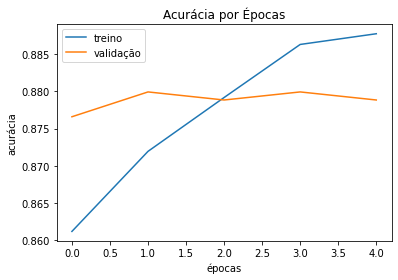

In [52]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por Épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

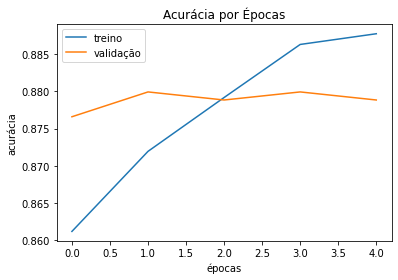

In [53]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por Épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

In [54]:
modelo.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'name': 'flatten_9_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Flatten',
   'config': {'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last',
    'dtype': 'float32',
    'name': 'flatten_9',
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_18',
    'trainable': True,
    'units': 256,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout_9',
    'noise_shape': None,
    'rate': 0.2,
    'se

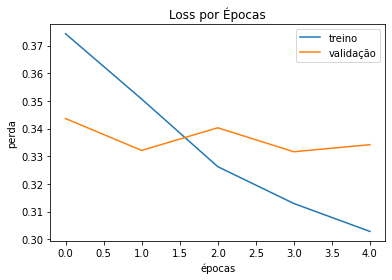

In [55]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Loss por Épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

In [56]:
vieses_da_camada_dense = modelo.layers[1].get_weights()[1]
vieses_da_camada_dense

array([-0.4818521 ,  0.15907095, -0.06727115,  0.3064708 , -0.0350339 ,
        0.01815489, -0.02365556,  0.26445946,  0.20126577, -0.35462865,
        0.09199278, -0.01362376,  0.24755758,  0.3146242 , -0.11198545,
        0.3847831 ,  0.15836854,  0.23643814,  0.11626071,  0.32941517,
        0.2839167 ,  0.03928252, -0.01084724,  0.16330777, -0.0104693 ,
        0.02382861,  0.14378177,  0.38079426,  0.28154403,  0.25464466,
        0.5861641 , -0.08437641, -0.01721008,  0.43245345, -0.04045121,
       -0.04142657, -0.00370971,  0.19210997,  0.18269826,  0.26689598,
       -0.27873376, -0.01273318,  0.19514869, -0.01358605,  0.07038599,
        0.45525536,  0.3889272 ,  0.37002492,  0.09856449,  0.17948058,
        0.24634941,  0.3160794 ,  0.10562037,  0.13688585,  0.00422903,
        0.16874014,  0.11447405, -0.01635486,  0.319057  , -0.00745097,
        0.10550676, -0.01668154, -0.03757516,  0.06415639,  0.00275344,
        0.43276328, -0.05232701, -0.32574114,  0.01588215,  0.01

In [57]:
#SALVANDO E CARREGANDO O MODELO TREINADO.

modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

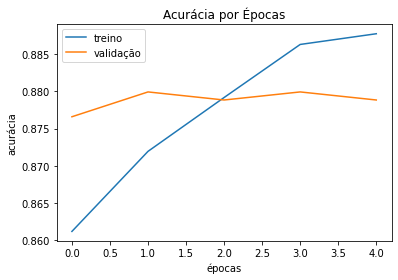

In [58]:
#GRÁFICO DA ACURÁCIA.

plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por Épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])


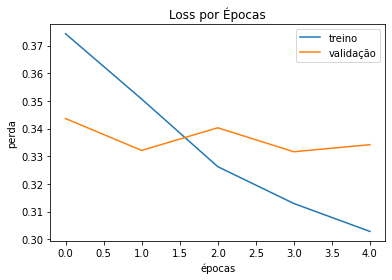

In [59]:
#GRÁFICO DO PERDAS.

plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Loss por Épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

In [60]:
#TESTANDO O MODELO X MODELO SALVO.

testes = modelo.predict(imagens_teste)
print('Resultado do Teste: ', np.argmax(testes[1]))
print('Número da Imagem de Teste:', identificacoes_teste[1])


testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('Resultado do Teste Modelo Salvo:', np.argmax(testes_modelo_salvo[1]))
print('Número da Imagem de Teste:', identificacoes_teste[1])

Resultado do Teste:  2
Número da Imagem de Teste: 2
Resultado do Teste Modelo Salvo: 2
Número da Imagem de Teste: 2


In [61]:
#AVALIANDO O MODELO.

perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do Teste:', perda_teste)
print('Acurácia do Teste:', acuracia_teste)

313/313 [==============================] - 1s 2ms/step - loss: 50.1573 - accuracy: 0.8623
Perda do Teste: 50.15732955932617
Acurácia do Teste: 0.8622999787330627
